In [ ]:
!pip install librosa numpy matplotlib pydub soundfile speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving call1.wav to call1.wav
Saving call2.wav to call2.wav
Saving call3.wav to call3.wav
Saving suspect_clean.wav to suspect_clean.wav


Visualize All 4 Files

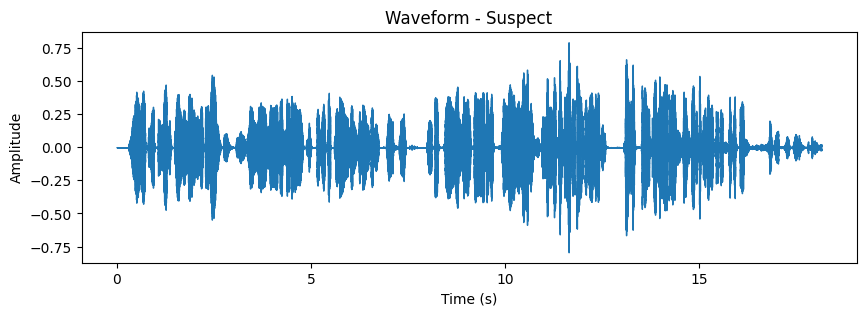

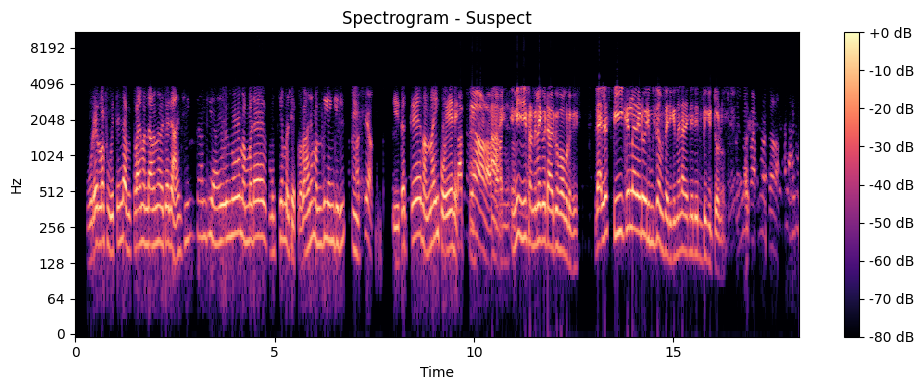

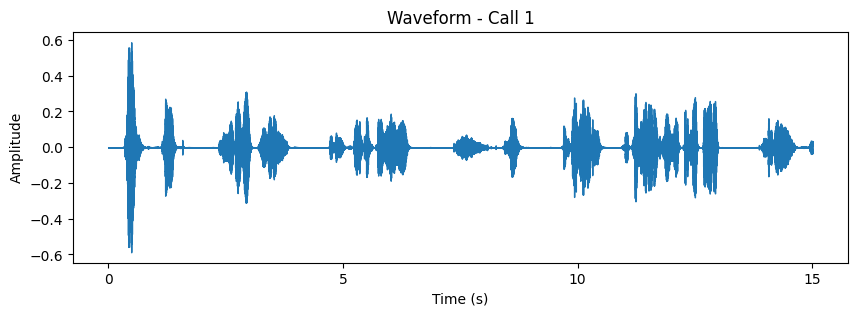

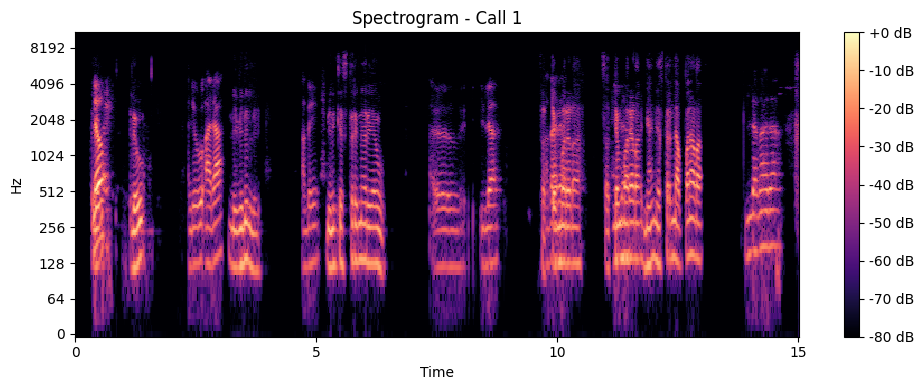

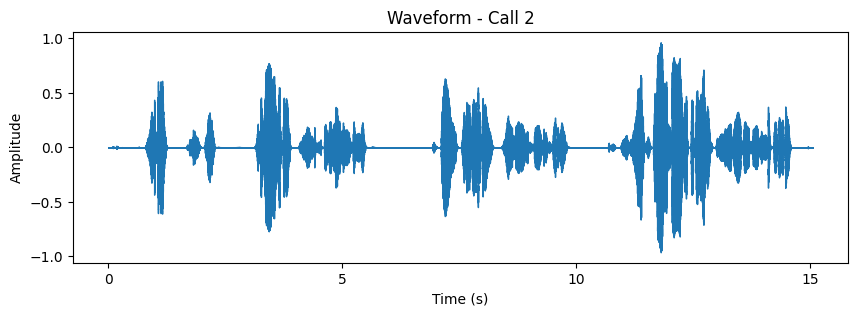

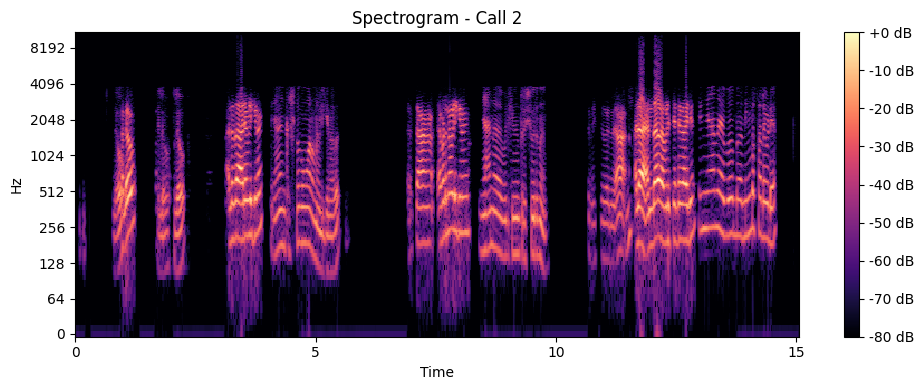

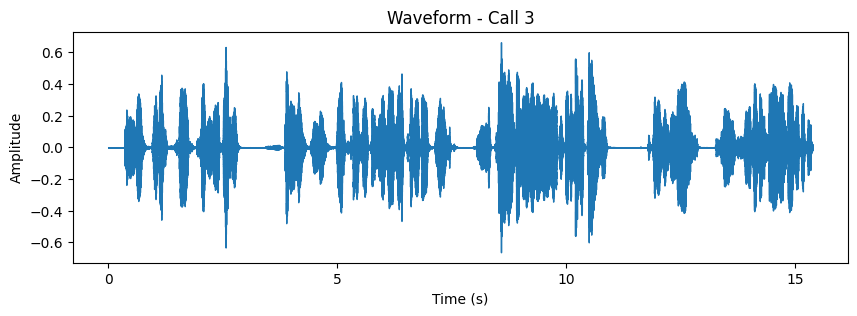

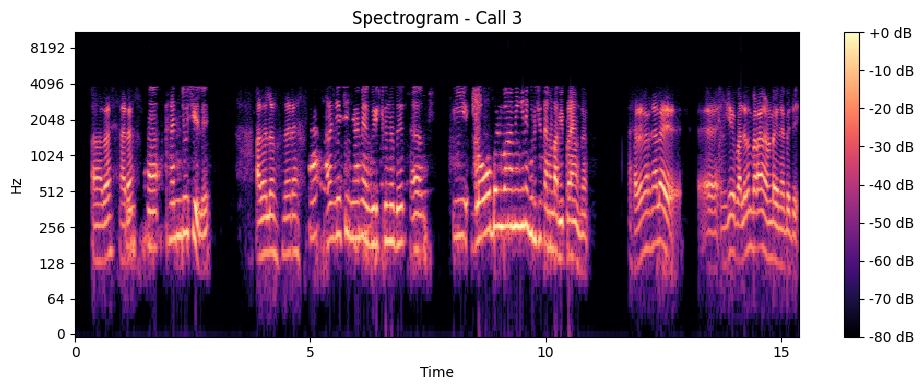

In [ ]:
# Plot waveform and spectrogram for all files
files = ["suspect_clean.wav", "call1.wav", "call2.wav", "call3.wav"]
titles = ["Suspect", "Call 1", "Call 2", "Call 3"]

for f, t in zip(files, titles):
    plot_waveform(f, t)
    plot_spectrogram(f, t)

In [ ]:
from scipy.spatial.distance import cdist

def compare_mfccs_normalized(mfcc1, mfcc2):
    dist = cdist(mfcc1.T, mfcc2.T, 'euclidean')
    dtw_score = np.min(np.sum(dist, axis=1))
    normalized_score = dtw_score / mfcc1.shape[1]
    return normalized_score


In [ ]:
def extract_mfcc_with_deltas(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)
    combined = np.vstack([mfcc, delta, delta2])
    return combined

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine_score(mfcc1, mfcc2):
    mean1 = np.mean(mfcc1, axis=1).reshape(1, -1)
    mean2 = np.mean(mfcc2, axis=1).reshape(1, -1)
    score = cosine_similarity(mean1, mean2)[0][0]
    return score


In [ ]:
suspect_mfcc = extract_mfcc_with_deltas("suspect_clean.wav")
call_files = ["call1.wav", "call2.wav", "call3.wav"]

for call in call_files:
    call_mfcc = extract_mfcc_with_deltas(call)
    dtw_score = compare_mfccs_normalized(suspect_mfcc, call_mfcc)
    cos_score = cosine_score(suspect_mfcc, call_mfcc)

    print(f"{call}:")
    print(f"  Normalized DTW Score: {dtw_score:.2f}")
    print(f"  Cosine Similarity: {cos_score:.3f}")


call1.wav:
  Normalized DTW Score: 128.82
  Cosine Similarity: 0.966
call2.wav:
  Normalized DTW Score: 132.01
  Cosine Similarity: 0.984
call3.wav:
  Normalized DTW Score: 118.62
  Cosine Similarity: 0.997
